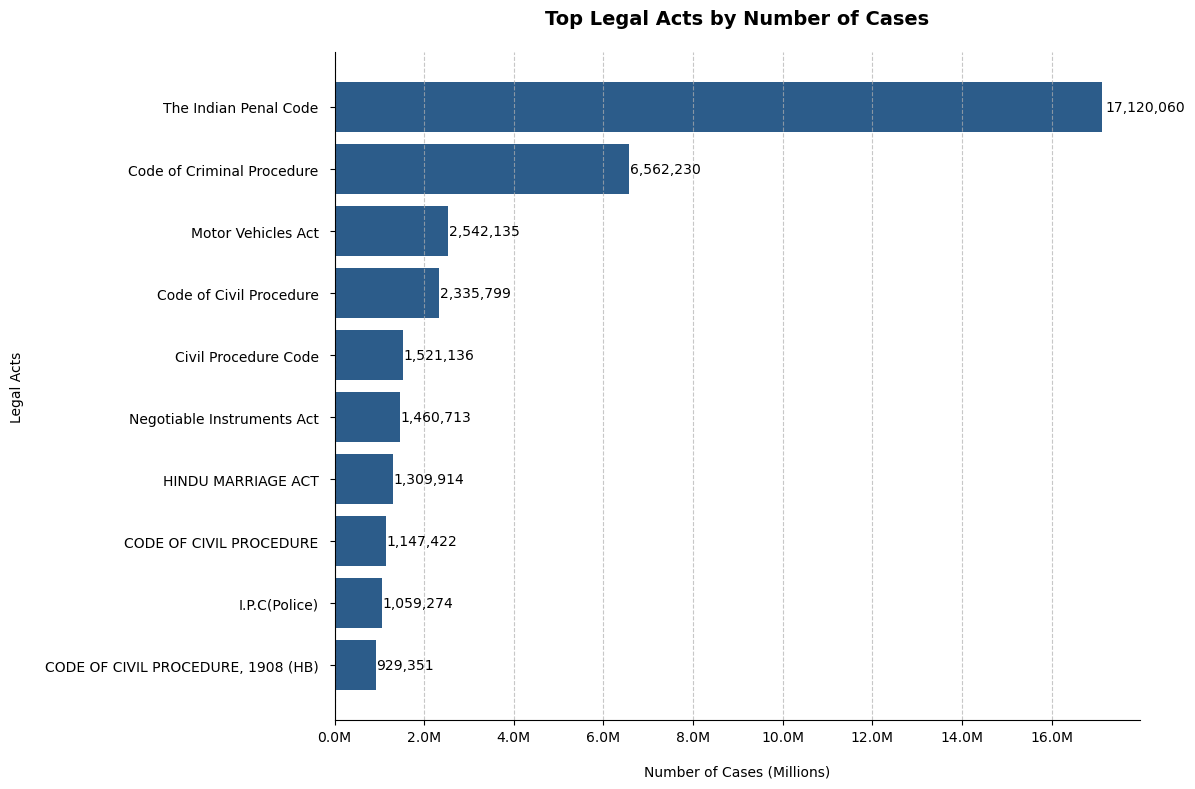

In [1]:
import matplotlib.pyplot as plt
import re

# Raw data input
data = """
                      act_s                      | no_of_cases
------------------------------------------------+-------------
 The Indian Penal Code                          |    17120060
 Code of Criminal Procedure                     |     6562230
 Motor Vehicles Act                             |     2542135
 Code of Civil Procedure                        |     2335799
 Civil Procedure Code                           |     1521136
 Negotiable Instruments Act                     |     1460713
 HINDU MARRIAGE ACT                             |     1309914
 CODE OF CIVIL PROCEDURE                        |     1147422
 I.P.C(Police)                                  |     1059274
 CODE OF CIVIL PROCEDURE, 1908 (HB)             |      929351
"""

# Parse the data
acts = []
cases = []

for line in data.strip().split('\n'):
    if '|' in line and not line.startswith('-'):
        parts = line.split('|')
        act = parts[0].strip()
        case = parts[1].strip().replace(',', '')
        
        if case.isdigit():
            acts.append(act)
            cases.append(int(case))

# Sort the data
sorted_data = sorted(zip(acts, cases), key=lambda x: x[1])
sorted_acts = [x[0] for x in sorted_data]
sorted_cases = [x[1] for x in sorted_data]

# Create visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_acts, sorted_cases, color='#2c5c8a')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.005, bar.get_y() + bar.get_height()/2,
             f'{width:,}', 
             va='center', ha='left')

# Formatting
plt.title('Top Legal Acts by Number of Cases', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Number of Cases (Millions)', labelpad=15)
plt.ylabel('Legal Acts', labelpad=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='y', which='major', pad=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Custom x-axis formatting
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()